In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import *
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, TomekLinks, EditedNearestNeighbours

In [3]:
# Change these paths to wherever has the cleaned BRFSS Data
df2019 = pd.read_csv('/content/drive/MyDrive/Cleaned_BRFSS2019.csv')
df2021 = pd.read_csv('/content/drive/MyDrive/Cleaned_BRFSS2021.csv')

In [4]:
# combined_df = pd.concat([df2019, df2021])
# combined_df.sample(5)

In [5]:
df2019 = df2019[df2019.Diabetes != 1]
df2021 = df2021[df2021.Diabetes != 1]
df2019['Diabetes'] = df2019['Diabetes'].replace(2, 1)
df2021['Diabetes'] = df2021['Diabetes'].replace(2, 1)


<ipython-input-5-f77de3a82621>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['Diabetes'] = df2019['Diabetes'].replace(2, 1)


In [6]:
df2019.shape

(171739, 22)

In [7]:
df2021.shape

(71124, 22)

In [8]:
df2019.Diabetes.value_counts()

,count
Diabetes,
0.0,147245
1.0,24494


# Results Without undersampling (you can skip running this)

In [9]:
X_train = df2019.drop(columns=['Diabetes'])  # Features
y_train = df2019['Diabetes']  # Target variable
X_test = df2021.drop(columns=['Diabetes'])
y_test = df2021['Diabetes']
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

Accuracy: 0.855801136044092

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     60862
         1.0       0.50      0.19      0.28     10262

    accuracy                           0.86     71124
   macro avg       0.69      0.58      0.60     71124
weighted avg       0.82      0.86      0.83     71124


Confusion Matrix:
 [[58915  1947]
 [ 8309  1953]]

AUC Score:
 0.5791616872343727


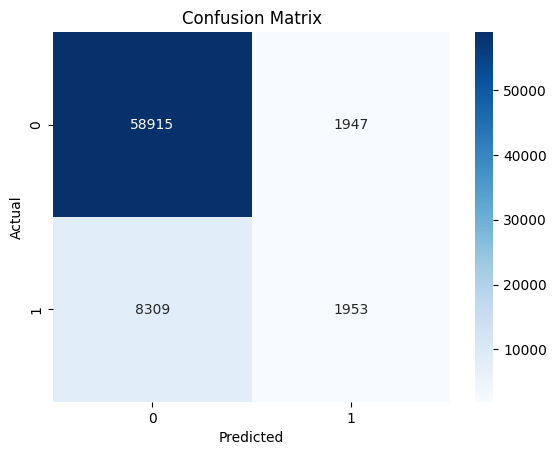

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Different Undersampling Code (skip running this)

In [ ]:
X = df2019.drop(columns=['Diabetes'])  # Features
y = df2019['Diabetes']  # Target variable

In [ ]:
X.shape

(171739, 21)

In [ ]:
# Resample dataset using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
X_rus.shape

(48988, 21)

In [ ]:
# Splitting the data into training and test sets
# X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)
X_train_rus, y_train_rus = X_rus,y_rus
X_test_rus = df2021.drop(columns=['Diabetes'])
y_test_rus = df2021['Diabetes']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_rus, y_train_rus)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rus = rf_classifier.predict(X_test_rus)

In [ ]:
print("Random Under Sampling Results:\n")
print("Class count:\n", y_rus.value_counts())
print("")
accuracy = accuracy_score(y_test_rus, y_pred_rus)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_rus, y_pred_rus))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_rus, y_pred_rus))
print("\nAUC Score:\n", roc_auc_score(y_test_rus, y_pred_rus))

Random Under Sampling Results:

Class count:
 Diabetes
0.0    24494
1.0    24494
Name: count, dtype: int64

Accuracy: 0.7179011304201114

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     60862
         1.0       0.31      0.77      0.44     10262

    accuracy                           0.72     71124
   macro avg       0.63      0.74      0.63     71124
weighted avg       0.86      0.72      0.76     71124


Confusion Matrix:
 [[43175 17687]
 [ 2377  7885]]

AUC Score:
 0.7388802388623736


In [ ]:
print("\nAUC Score:\n", roc_auc_score(y_test_rus, y_pred_rus))


AUC Score:
 0.7388802388623736


In [ ]:
# Resample dataset using Cluster Centroids
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)

KeyboardInterrupt: 

In [ ]:
# Splitting the data into training and test sets
# X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X_cc, y_cc, test_size=0.2, random_state=42)
X_train_cc, y_train_cc = X_cc,y_cc
X_test_cc = df2021.drop(columns=['Diabetes'])
y_test_cc = df2021['Diabetes']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=11)
rf_classifier.fit(X_train_cc, y_train_cc)

In [ ]:
y_pred_cc = rf_classifier.predict(X_test_cc)

In [ ]:
print("Cluster Centroid Under Sampling Results:\n")
print("Class count:\n", y_cc.value_counts())
print("")
accuracy = accuracy_score(y_test_cc, y_pred_cc)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_cc, y_pred_cc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_cc, y_pred_cc))
print("\nAUC Score:\n", roc_auc_score(y_test_cc, y_pred_cc))

In [ ]:
print("\nAUC Score:\n", roc_auc_score(y_test_cc, y_pred_cc))

In [ ]:
# Resample dataset using NearMiss
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X, y)

In [ ]:
# Splitting the data into training and test sets
# X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size=0.2, random_state=42)
X_train_nm, y_train_nm = X_nm,y_nm
X_test_nm = df2021.drop(columns=['Diabetes'])
y_test_nm = df2021['Diabetes']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_nm, y_train_nm)

In [ ]:
y_pred_nm = rf_classifier.predict(X_test_nm)

In [ ]:
print("Near Miss Under Sampling Results:\n")
print("Class count:\n", y_nm.value_counts())
print("")
accuracy = accuracy_score(y_test_nm, y_pred_nm)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_nm, y_pred_nm))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_nm, y_pred_nm))
print("\nAUC Score:\n", roc_auc_score(y_test_nm, y_pred_nm))

In [ ]:
print("\nAUC Score:\n", roc_auc_score(y_test_nm, y_pred_nm))

In [ ]:
# Tomek Links Under Sampling
tl = TomekLinks()

In [ ]:
X_tl, y_tl = tl.fit_resample(X, y)

In [ ]:
# Splitting the data into training and test sets
# X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)
X_train_tl, y_train_tl = X_tl,y_tl
X_test_tl = df2021.drop(columns=['Diabetes'])
y_test_tl = df2021['Diabetes']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tl, y_train_tl)

In [ ]:
y_pred_tl = rf_classifier.predict(X_test_tl)

In [ ]:
print("Tomek Links Under Sampling Results:\n")
print("Class count:\n", y_tl.value_counts())
print("")
accuracy = accuracy_score(y_test_tl, y_pred_tl)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_tl, y_pred_tl))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_tl, y_pred_tl))
print("\nAUC Score:\n", roc_auc_score(y_test_tl, y_pred_tl))

Tomek Links Under Sampling Results:

Class count:
 Diabetes
0.0    141432
2.0     24494
Name: count, dtype: int64

Accuracy: 0.8544092008323492

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     60862
         2.0       0.49      0.24      0.32     10262

    accuracy                           0.85     71124
   macro avg       0.69      0.60      0.62     71124
weighted avg       0.83      0.85      0.83     71124


Confusion Matrix:
 [[58280  2582]
 [ 7773  2489]]

AUC Score:
 0.6000607343490914


In [ ]:
# Edited Nearest Neighbors Under Sampling
enn = EditedNearestNeighbours()

In [ ]:
X_enn, y_enn = enn.fit_resample(X, y)

In [ ]:
# Splitting the data into training and test sets
# X_train_enn, X_test_enn, y_train_enn, y_test_enn = train_test_split(X_enn, y_enn, test_size=0.2, random_state=42)
X_train_enn, y_train_enn = X_enn,y_enn
X_test_enn = df2021.drop(columns=['Diabetes'])
y_test_enn = df2021['Diabetes']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_enn, y_train_enn)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_enn = rf_classifier.predict(X_test_enn)

In [ ]:
print("Edited Nearest Neighbors Under Sampling Results:\n")
print("Class count:\n", y_enn.value_counts())
print("")
accuracy = accuracy_score(y_test_enn, y_pred_enn)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_enn, y_pred_enn))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_enn, y_pred_enn))
print("\nAUC Score:\n", roc_auc_score(y_test_enn, y_pred_enn))

Edited Nearest Neighbors Under Sampling Results:

Class count:
 Diabetes
0.0    109081
2.0     24494
Name: count, dtype: int64

Accuracy: 0.816798830212024

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     60862
         2.0       0.40      0.52      0.45     10262

    accuracy                           0.82     71124
   macro avg       0.66      0.69      0.67     71124
weighted avg       0.84      0.82      0.83     71124


Confusion Matrix:
 [[52732  8130]
 [ 4900  5362]]

AUC Score:
 0.6944646720066235


Using Tomek Links and ENN, along with Cluster Centroids

In [ ]:
# Tomek Links Under Sampling
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y)
# Resample dataset using Cluster Centroids
cc = ClusterCentroids()
X_tlcc, y_tlcc = cc.fit_resample(X_tl, y_tl)

In [ ]:
# Splitting the data into training and test sets
# X_train_tlcc, X_test_tlcc, y_train_tlcc, y_test_tlcc = train_test_split(X_tlcc, y_tlcc, test_size=0.2, random_state=42)

X_train_tlcc, y_train_tlcc = X_tlcc,y_tlcc
X_test_tlcc = df2021.drop(columns=['Diabetes'])
y_test_tlcc = df2021['Diabetes']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tlcc, y_train_tlcc)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_tlcc = rf_classifier.predict(X_test_tlcc)

In [ ]:
print("Tomek Links + Cluster Centroids Under Sampling Results:\n")
print("Class count:\n", y_tlcc.value_counts())
print("")
accuracy = accuracy_score(y_test_tlcc, y_pred_tlcc)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_tlcc, y_pred_tlcc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_tlcc, y_pred_tlcc))
print("\nAUC Score:\n", roc_auc_score(y_test_tlcc, y_pred_tlcc))

Tomek Links + Cluster Centroids Under Sampling Results:

Class count:
 Diabetes
0.0    24494
2.0    24494
Name: count, dtype: int64

Accuracy: 0.32734379393734886

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.22      0.36     60862
         2.0       0.17      0.95      0.29     10262

    accuracy                           0.33     71124
   macro avg       0.57      0.59      0.33     71124
weighted avg       0.85      0.33      0.35     71124


Confusion Matrix:
 [[13516 47346]
 [  496  9766]]

AUC Score:
 0.5868712570839849


Using ENN and Cluster Centroids Under Sampling

In [ ]:
# Edited Nearest Neighbors Under Sampling
enn = EditedNearestNeighbours()
X_enn, y_enn = enn.fit_resample(X, y)
# Resample dataset using Cluster Centroids
cc = ClusterCentroids()
X_enncc, y_enncc = cc.fit_resample(X_enn, y_enn)

In [ ]:
# Splitting the data into training and test sets
# X_train_enncc, X_test_enncc, y_train_enncc, y_test_enncc = train_test_split(X_enncc, y_enncc, test_size=0.2, random_state=42)
X_train_enncc, y_train_enncc = X_enncc,y_enncc
X_test_enncc = df2021.drop(columns=['Diabetes'])
y_test_enncc = df2021['Diabetes']

In [ ]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_enncc, y_train_enncc)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_enncc = rf_classifier.predict(X_test_enncc)

In [ ]:

print("Edited Nearest Neighbors + Cluster Centroids Under Sampling Results:\n")
print("Class count:\n", y_enncc.value_counts())
print("")
accuracy = accuracy_score(y_test_enncc, y_pred_enncc)
print("Accuracy:", accuracy)
print("")
print("Classification Report:\n", classification_report(y_test_enncc, y_pred_enncc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test_enncc, y_pred_enncc))
print("\nAUC Score:\n", roc_auc_score(y_test_enncc, y_pred_enncc))

Edited Nearest Neighbors + Cluster Centroids Under Sampling Results:

Class count:
 Diabetes
0.0    24494
2.0    24494
Name: count, dtype: int64

Accuracy: 0.417608683426129

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.33      0.49     60862
         2.0       0.19      0.93      0.32     10262

    accuracy                           0.42     71124
   macro avg       0.58      0.63      0.40     71124
weighted avg       0.86      0.42      0.47     71124


Confusion Matrix:
 [[20108 40754]
 [  668  9594]]

AUC Score:
 0.6326461265787695


#One custom stratified sampling 1 : 2

In [ ]:
df2019.Diabetes.value_counts()

,count
Diabetes,
0.0,147245
1.0,24494


In [10]:
X_test = df2021.drop(columns=['Diabetes'])
y_test = df2021['Diabetes']

df_minority = df2019[df2019['Diabetes'] == 1]
df_majority = df2019[df2019['Diabetes'] == 0]

#Stratified sampling using Test train split function

_,df_majority_us = train_test_split(df_majority,test_size = 2*len(df_minority)/len(df2019), random_state = 319)

In [11]:
len(df_majority_us),len(df_minority)

(42002, 24494)

In [12]:
X = pd.concat([df_majority_us, df_minority])
X_train = X.drop(columns=['Diabetes'])  # Features
y_train = X['Diabetes']  # Target variable

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,class_weight ='balanced')
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
print("Custom Stratified Sampling:\n")
print("Class count:\n", y_train.value_counts())
print("")
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix =  confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

print("\nRandom Forest:")

rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy}")
print(f"Recall: {rf_recall}")
print(f"AUC: {rf_auc}")

Custom Stratified Sampling:

Class count:
 Diabetes
0.0    42002
1.0    24494
Name: count, dtype: int64

Accuracy: 0.7891850852033069

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.82      0.87     60862
         1.0       0.36      0.61      0.45     10262

    accuracy                           0.79     71124
   macro avg       0.64      0.71      0.66     71124
weighted avg       0.84      0.79      0.81     71124


Confusion Matrix:
 [[49906 10956]
 [ 4038  6224]]

AUC Score:
 0.7132478253165571

Random Forest:
Accuracy: 0.7891850852033069
Recall: 0.6065094523484701
AUC: 0.7132478253165571


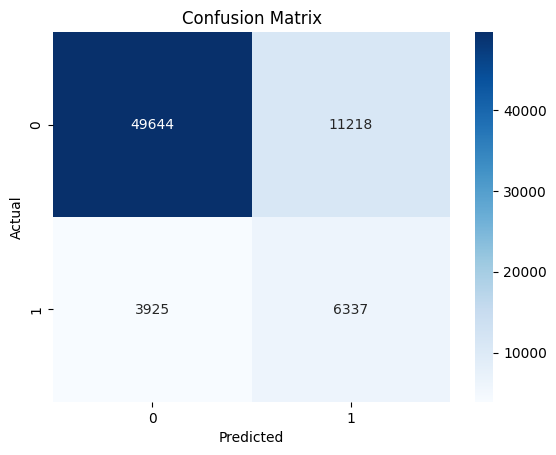

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Trying different models - Model Comparison

## DT, NBGaussian, LR, SVM


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred,pos_label=1.0)
  print(classification_report(y_test, y_pred))

  try:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
  except AttributeError:
    auc = "Not applicable for this model"

  return accuracy, recall, auc

#Random Forest

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=123)
dt_accuracy, dt_recall, dt_auc = evaluate_model(dt_model, X_train, X_test, y_train, y_test)
print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Recall: {dt_recall}")
print(f"AUC: {dt_auc}")

# Naive Bayes
nb_model = GaussianNB()
nb_accuracy, nb_recall, nb_auc = evaluate_model(nb_model, X_train, X_test, y_train, y_test)
print("\nNaive Bayes:")
print(f"Accuracy: {nb_accuracy}")
print(f"Recall: {nb_recall}")
print(f"AUC: {nb_auc}")



lr_model = LogisticRegression(random_state=431)
lr_accuracy, lr_recall, lr_auc = evaluate_model(lr_model, X_train, X_test, y_train, y_test)
print("\nLogistic Regression:")
print(f"Accuracy: {lr_accuracy}")
print(f"Recall: {lr_recall}")
print(f"AUC: {lr_auc}")


# SVM
svm_model = SVC(probability=True, random_state=9010)  # Enable probability estimates for AUC
svm_accuracy, svm_recall, svm_auc = evaluate_model(svm_model, X_train, X_test, y_train, y_test)
print("\nSVM:")
print(f"Accuracy: {svm_accuracy}")
print(f"Recall: {svm_recall}")
print(f"AUC: {svm_auc}")

              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82     60862
         1.0       0.27      0.56      0.36     10262

    accuracy                           0.72     71124
   macro avg       0.59      0.65      0.59     71124
weighted avg       0.82      0.72      0.75     71124

Decision Tree:
Accuracy: 0.718519768291997
Recall: 0.5558370687975054
AUC: 0.652065215240941
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85     60862
         1.0       0.34      0.63      0.44     10262

    accuracy                           0.77     71124
   macro avg       0.63      0.71      0.65     71124
weighted avg       0.84      0.77      0.79     71124


Naive Bayes:
Accuracy: 0.7660142849108599
Recall: 0.6332099006041707
AUC: 0.7942932995227961


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88     60862
         1.0       0.39      0.58      0.46     10262

    accuracy                           0.81     71124
   macro avg       0.65      0.71      0.67     71124
weighted avg       0.85      0.81      0.82     71124


Logistic Regression:
Accuracy: 0.8067740846971486
Recall: 0.5812707074644319
AUC: 0.8205520985870627
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88     60862
         1.0       0.39      0.60      0.47     10262

    accuracy                           0.81     71124
   macro avg       0.66      0.72      0.68     71124
weighted avg       0.85      0.81      0.82     71124


SVM:
Accuracy: 0.8076317417468084
Recall: 0.597544338335607
AUC: 0.8265177434198595


In [ ]:
1+1

In [ ]:
svm_model = SVC(probability=True, random_state=9010)  # Enable probability estimates for AUC
svm_accuracy, svm_recall, svm_auc = evaluate_model(svm_model, X_train, X_test, y_train, y_test)
print("\nSVM:")
print(f"Accuracy: {svm_accuracy}")
print(f"Recall: {svm_recall}")
print(f"AUC: {svm_auc}")

## XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state = 1016, class_weight='balanced')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", xgb_accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix =  confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

print("\nXGBoost:")

xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {xgb_accuracy}")
print(f"Recall: {xgb_recall}")
print(f"AUC: {xgb_auc}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:52:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7947809459535459

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.82      0.87     60862
         1.0       0.38      0.64      0.47     10262

    accuracy                           0.79     71124
   macro avg       0.65      0.73      0.67     71124
weighted avg       0.85      0.79      0.81     71124


Confusion Matrix:
 [[49979 10883]
 [ 3713  6549]]

AUC Score:
 0.7296826625696811

XGBoost:
Accuracy: 0.7947809459535459
Recall: 0.638179692067823
AUC: 0.7296826625696811


##LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state = 1016,is_unbalance= True)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

lgbm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lgbm_accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix =  confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

print("\nLightGBM:")

lgbm_recall = recall_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {lgbm_auc}")
print(f"Accuracy score: {lgbm_accuracy}")
print(f"Recall score: {lgbm_recall}")
print(f"F1_score: "+str(f1_score(y_test,y_pred)))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 24494, number of negative: 42002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 66496, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368353 -> initscore=-0.539289
[LightGBM] [Info] Start training from score -0.539289
Accuracy: 0.728094595354592

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     60862
         1.0       0.32      0.79      0.45     10262

    accuracy                           0.73     71124
   macro avg       0.64      0.75      0.64     71124
weighted avg       0.86      0.73      0.77     71124


Confusion Matrix:
 [[43722 17140]
 [ 2199  8063]]

AUC Score:


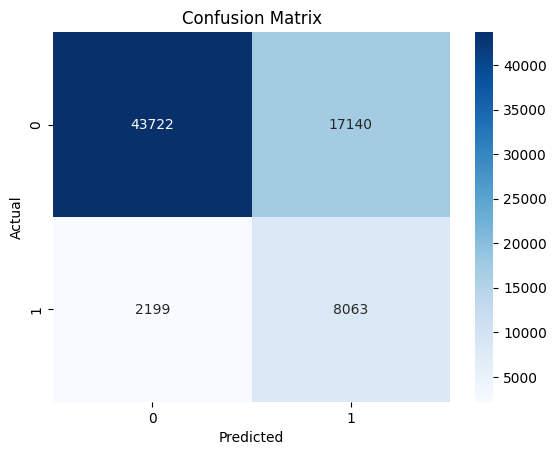

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ADAboost

In [ ]:
adb_model = AdaBoostClassifier(random_state = 1016)
adb_model.fit(X_train, y_train)
y_pred = adb_model.predict(X_test)

adb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", adb_accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix =  confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

print("\n AdaBoost:")

adb_recall = recall_score(y_test, y_pred)
adb_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {adb_accuracy}")
print(f"Recall: {adb_recall}")
print(f"AUC: {adb_auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.800911084865868

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.83      0.88     60862
         1.0       0.38      0.62      0.47     10262

    accuracy                           0.80     71124
   macro avg       0.66      0.73      0.68     71124
weighted avg       0.85      0.80      0.82     71124


Confusion Matrix:
 [[50609 10253]
 [ 3907  6355]]

AUC Score:
 0.7254059573581163

 AdaBoost:
Accuracy: 0.800911084865868
Recall: 0.6192749951276554
AUC: 0.7254059573581163


## Neural Networks

In [ ]:
X_train.shape

(66496, 21)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

METRICS = [
      keras.metrics.Accuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Define the neural network model

nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])  # Output layer with sigmoid activation for binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

# Train the model
history = nn_model.fit(X_train, y_train,
                    epochs = 10, batch_size = 200,
                    validation_split = 0.2,
                    shuffle = True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.0000e+00 - auc: 0.6046 - loss: 0.7740 - prc: 0.2799 - precision: 0.3234 - recall: 0.2241 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 1.1977 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 0.2395
Epoch 2/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - auc: 0.8037 - loss: 0.4082 - prc: 0.4946 - precision: 0.5809 - recall: 0.2820 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 1.2020 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 0.2395
Epoch 3/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - auc: 0.8124 - loss: 0.4023 - prc: 0.5127 - precision: 0.5899 - recall: 0.3063 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_loss: 1.0500 - val_prc: 1.0000 - val_precision: 1.0000 - val_recall: 0.3786
Epoch 4/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - auc: 0.8174 - loss: 0.3999 - prc: 0.5211 - precision: 0.5948 - 

In [ ]:
#predict on the nn model

y_pred_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int) # Convert probabilities to binary predictions

nn_accuracy = accuracy_score(y_test, y_pred_nn)
print("Accuracy:", nn_accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("")
cf_matrix =  confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred_nn))

print("\nNeural Network:")

nn_recall = recall_score(y_test, y_pred_nn)
nn_auc = roc_auc_score(y_test, y_pred_nn)
print(f"Accuracy: {nn_accuracy}")
print(f"Recall: {nn_recall}")
print(f"AUC: {nn_auc}")

2223/2223 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.8423598222822114

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.91      0.91     60862
         1.0       0.45      0.43      0.44     10262

    accuracy                           0.84     71124
   macro avg       0.68      0.67      0.67     71124
weighted avg       0.84      0.84      0.84     71124


Confusion Matrix:
 [[55488  5374]
 [ 5838  4424]]

AUC Score:
 0.6714034653486429

Neural Network:
Accuracy: 0.8423598222822114
Recall: 0.4311050477489768
AUC: 0.6714034653486429


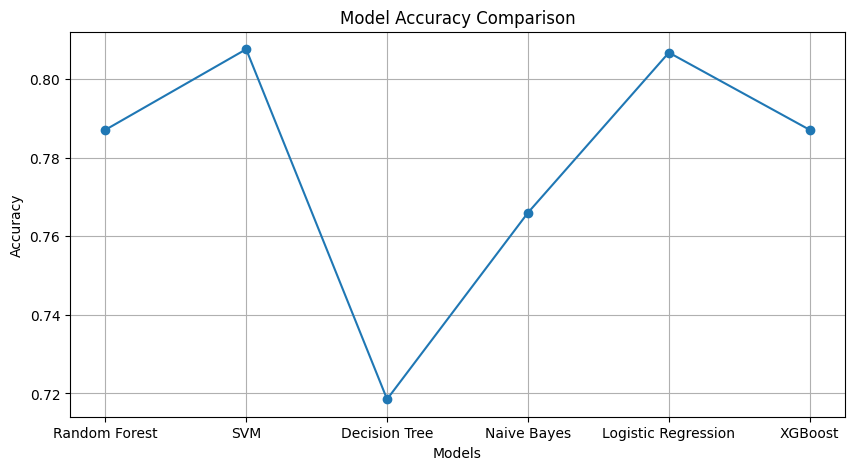

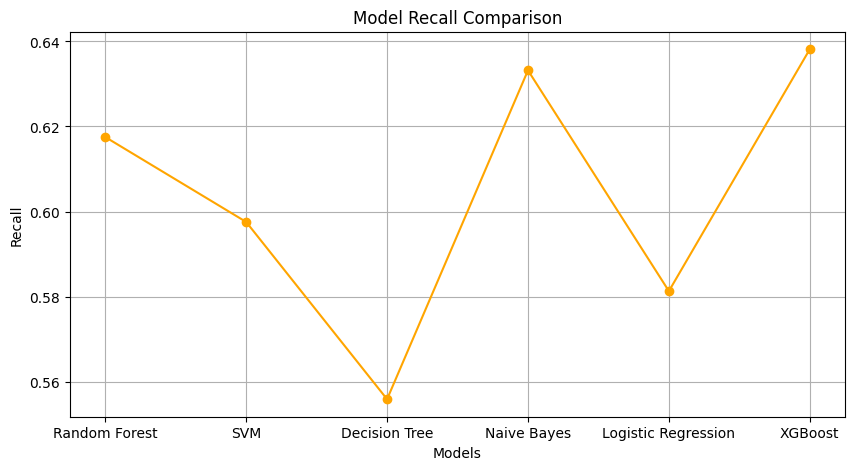

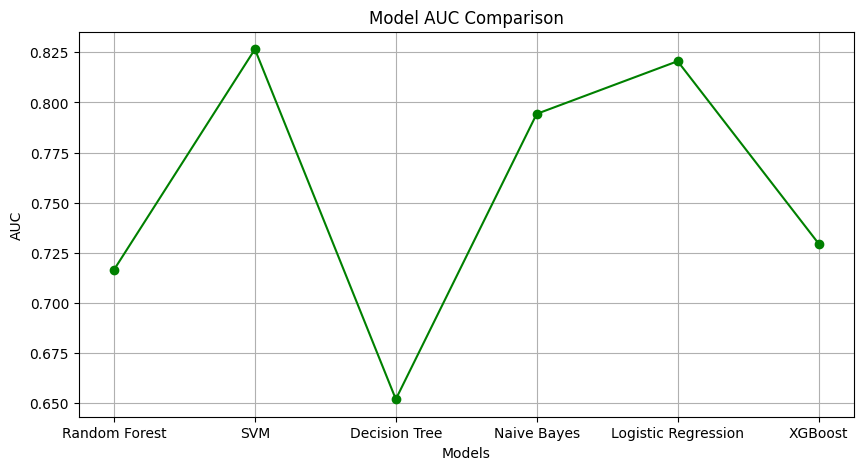

In [ ]:
# prompt: Give charts for accuracy, recall, AUC seperately and show the trend, dont do bar graphs and add random forest, SVM

import matplotlib.pyplot as plt

# Assuming you have the following variables for accuracy, recall, and AUC for each model:
models = ['Random Forest', 'SVM', 'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'XGBoost']
accuracies = [accuracy, svm_accuracy, dt_accuracy, nb_accuracy, lr_accuracy, accuracy]
recalls = [rf_recall, svm_recall, dt_recall, nb_recall, lr_recall, xgb_recall]
aucs = [rf_auc, svm_auc, dt_auc, nb_auc, lr_auc, xgb_auc]

# Accuracy Chart
plt.figure(figsize=(10, 5))
plt.plot(models, accuracies, marker='o')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Recall Chart
plt.figure(figsize=(10, 5))
plt.plot(models, recalls, marker='o', color='orange')
plt.title('Model Recall Comparison')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

# AUC Chart
plt.figure(figsize=(10, 5))
plt.plot(models, aucs, marker='o', color='green')
plt.title('Model AUC Comparison')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.grid(True)
plt.show()


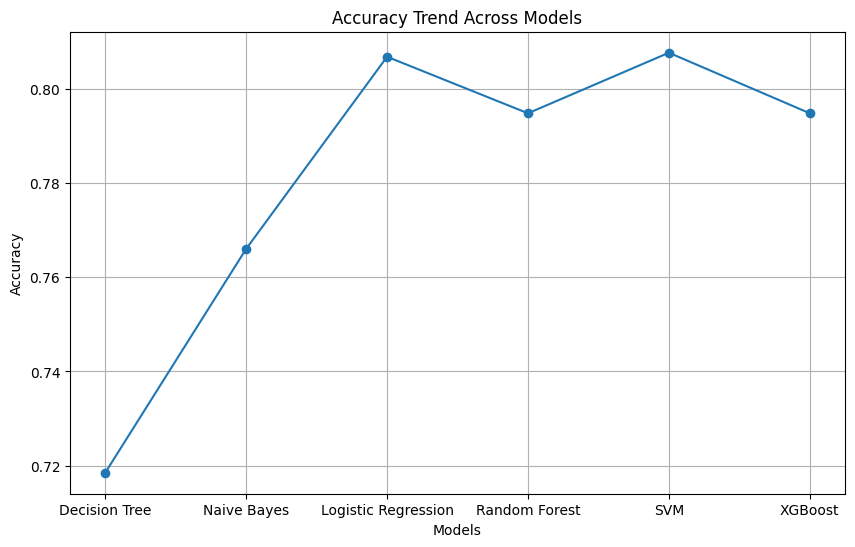

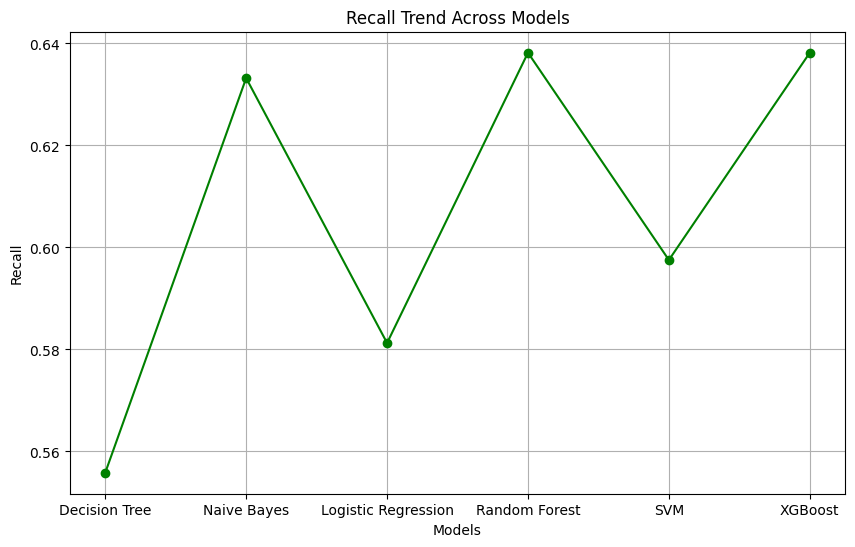

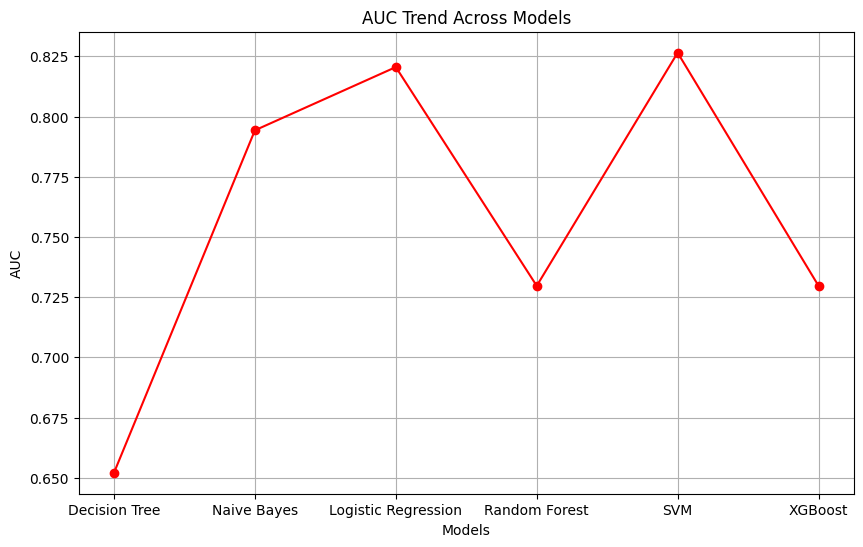

In [ ]:
# prompt: Give charts for accuracy, recall, AUC seperately and show the trend, dont do bar graphs and add random forest

import matplotlib.pyplot as plt

models = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'SVM','XGBoost']
accuracies = [dt_accuracy, nb_accuracy, lr_accuracy, rf_accuracy, svm_accuracy,xgb_accuracy]
recalls = [dt_recall, nb_recall, lr_recall, rf_recall,svm_recall,xgb_recall]
aucs = [dt_auc, nb_auc, lr_auc, rf_auc, svm_auc,xgb_auc]

# Accuracy Trend
plt.figure(figsize=(10, 6))


plt.plot(models, accuracies, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend Across Models')
plt.grid(True)
plt.show()

# Recall Trend
plt.figure(figsize=(10, 6))
plt.plot(models, recalls, marker='o', color='green')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Trend Across Models')
plt.grid(True)
plt.show()

# AUC Trend
plt.figure(figsize=(10, 6))
plt.plot(models, aucs, marker='o', color='red')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.title('AUC Trend Across Models')
plt.grid(True)
plt.show()


# Hyperparameter Tuning (LightGBM)

In [ ]:
# Define parameter grid for GridSearchCV
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
param_grid = {
"n_estimators": [50, 100, 200],
"learning_rate": [0.05, 0.1, 0.2],
"num_leaves": [31, 63, 127],
"max_depth": [3, 5, 7],
"min_child_samples": [20, 50, 100],
"subsample": [0.6, 0.8, 1.0],
"verbose":[-1]
}

lgbm = LGBMClassifier(random_state=9010, is_unbalance = True)

# Create GridSearchCV instance
grid = GridSearchCV(lgbm, param_grid, cv=5, scoring=["roc_auc","recall"],refit = "recall")

# Fit the grid search object to the training data



In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(is_unbalance=True, random_state=9010),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 6, 7],
                         'n_estimators': [200], 'num_leaves': [31],
                         'subsample': [0.6], 'verbose': [-1]},
             refit='recall', scoring=['roc_auc', 'recall'])

In [ ]:
# Print best parameters and score
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.6, 'verbose': -1}
Best score: 0.80464610947593


In [ ]:
 y_pred = grid.best_estimator_.predict(X_test)


lgbm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lgbm_accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix =  confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

print("\nLightGBM:")

lgbm_recall = recall_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {lgbm_auc}")
print(f"Accuracy score: {lgbm_accuracy}")
print(f"Recall score: {lgbm_recall}")
print(f"F1_score: "+str(f1_score(y_test,y_pred)))

Accuracy: 0.7295568303245037

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     60862
         1.0       0.32      0.78      0.46     10262

    accuracy                           0.73     71124
   macro avg       0.64      0.75      0.64     71124
weighted avg       0.86      0.73      0.77     71124


Confusion Matrix:
 [[43837 17025]
 [ 2210  8052]]

AUC Score:
 0.7524555873727863

LightGBM:
AUC: 0.7524555873727863
Accuracy score: 0.7295568303245037
Recall score: 0.7846423699084
F1_score: 0.4557005008630691


In [ ]:
#HyperOpt
# !pip install hyperopt
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

space = {
    'n_estimators': hp.choice('n_estimators',list(np.arange(100, 500, 20))),
    'max_depth': hp.choice('max_depth', list(np.arange(3, 15, dtype=int))),
    'min_samples_split': hp.choice('min_samples_split', list(np.arange(2, 15, dtype=int))),
    'min_samples_leaf': hp.choice('min_samples_leaf',list( np.arange(1, 15, dtype=int))),
    'learning_rate': hp.choice('learning_rate', np.arange(0.05,0.2,0.05)),
    'max_samples': hp.choice('max_samples', np.arange(0.6,1.0,0.1))
}

# objective function
def objective(params):
    clf = LGBMClassifier(**params,random_state=1234, is_unbalance=True)
    clf.fit(X_train, y_train)
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall').mean()
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()

# optimization
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

# best parameters
print(best_params)

100%|██████████| 100/100 [20:38<00:00, 12.39s/trial, best loss: -0.8071365219741764]
{'learning_rate': 0, 'max_depth': 5, 'max_samples': 3, 'min_samples_leaf': 11, 'min_samples_split': 6, 'n_estimators': 1}


In [ ]:
clf = LGBMClassifier(random_state=1234, is_unbalance = True, learning_rate =0.05, max_depth=8, max_samples=0.9, min_samples_leaf = 12, min_samples_split=8, n_estimators = 120)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

lgbm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lgbm_accuracy)
print("")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("")
cf_matrix =  confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:\n", roc_auc_score(y_test, y_pred))

print("\nLightGBM:")

lgbm_recall = recall_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {lgbm_auc}")
print(f"Accuracy score: {lgbm_accuracy}")
print(f"Recall score: {lgbm_recall}")
print(f"F1_score: "+str(f1_score(y_test,y_pred)))

Accuracy: 0.727307238063101

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     60862
         1.0       0.32      0.79      0.45     10262

    accuracy                           0.73     71124
   macro avg       0.64      0.75      0.64     71124
weighted avg       0.86      0.73      0.77     71124


Confusion Matrix:
 [[43653 17209]
 [ 2186  8076]]

AUC Score:
 0.7521133336263582

LightGBM:
AUC: 0.7521133336263582
Accuracy score: 0.727307238063101
Recall score: 0.7869810953030598
F1_score: 0.45438433623090557


# SHAP

In [13]:
from lightgbm import LGBMClassifier
import shap
import pandas as pd

lgbm_model = LGBMClassifier(random_state=1234, is_unbalance = True, learning_rate =0.05, max_depth=8, max_samples=0.9, min_samples_leaf = 12, min_samples_split=8, n_estimators = 120)

lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)


explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X_test)

def explain_prediction(idx):
    prediction = y_pred[idx]
    feature_names = X_test.columns

    class_shap_values = shap_values[idx]


    explanation_df = pd.DataFrame({
        'Feature': feature_names,
        'SHAP Value': class_shap_values
    })

    top_features = explanation_df.reindex(explanation_df['SHAP Value'].abs().sort_values(ascending=False).index).head(5)
    if prediction == 1:
        print("The prediction was Diabetic due to the following features:")
    else:
        print("The prediction was Non Diabetic due to the following features:")

    for _, row in top_features.iterrows():
        print(f"- {row['Feature']}: {row['SHAP Value']:.4f}")
    print("\n")


for i in range(25):
    explain_prediction(i)

[LightGBM] [Warning] Unknown parameter: max_samples
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Unknown parameter: max_samples
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Info] Number of positive: 24494, number of negative: 42002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 66496, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368353 

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
